Classification Report:
              precision    recall  f1-score   support

    American       0.59      0.50      0.54        48
      Bakery       0.25      0.07      0.11       115
        Cafe       0.35      0.13      0.19       127
     Chinese       0.25      0.03      0.05       165
 Continental       0.18      0.06      0.09        50
   Fast Food       0.14      0.01      0.03       137
      Mithai       0.42      0.45      0.43        56
North Indian       0.46      0.89      0.61       598
South Indian       0.00      0.00      0.00        57
 Street Food       0.62      0.16      0.25        50

    accuracy                           0.45      1403
   macro avg       0.32      0.23      0.23      1403
weighted avg       0.36      0.45      0.34      1403

Confusion Matrix:
[[ 24   0   2   2   0   0   0  20   0   0]
 [  0   8   4   0   1   4   4  93   0   1]
 [  6   3  17   3   0   2   0  96   0   0]
 [  7   2   3   5   3   0   0 145   0   0]
 [  2   0   2   1   3   0   

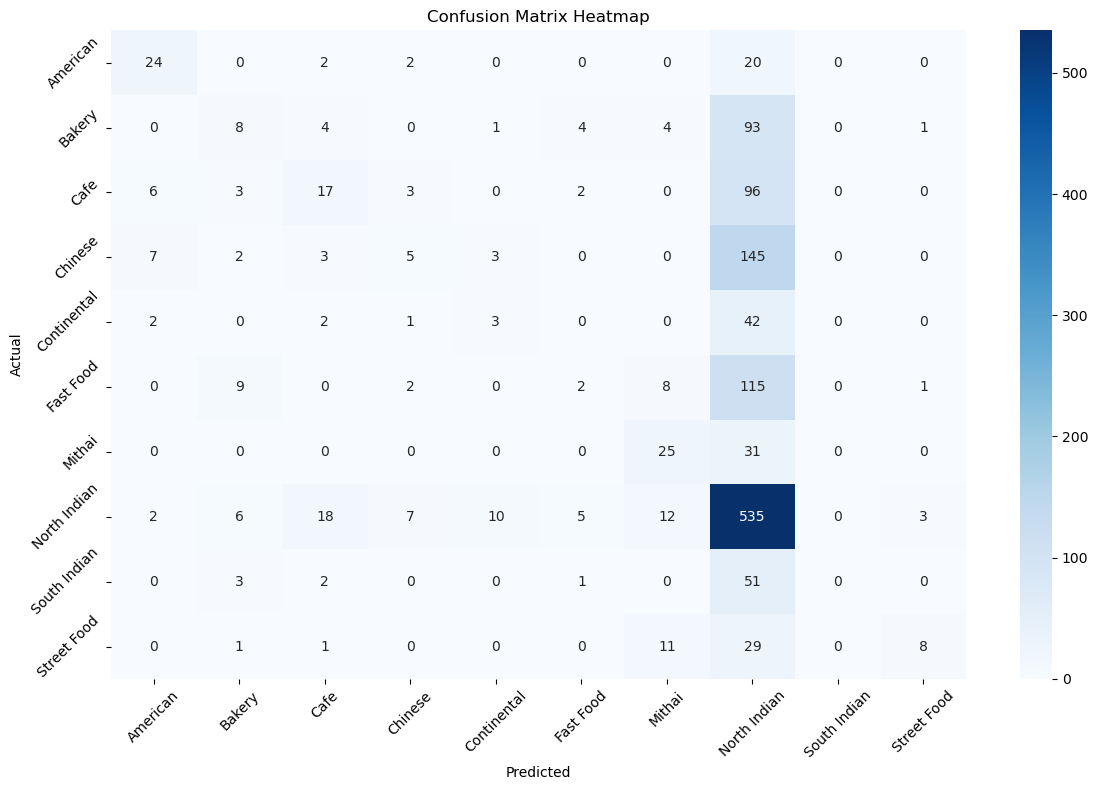

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv(r'D:\INTERN PROGRAM\Dataset .csv', encoding='latin-1')

df = df[['Cuisines', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Price range', 'Average Cost for two']].dropna()

df['Cuisines'] = df['Cuisines'].apply(lambda x: x.split(',')[0])

top_10_cuisines = df['Cuisines'].value_counts().head(10).index

df_top10 = df[df['Cuisines'].isin(top_10_cuisines)]

features = df_top10[['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Price range', 'Average Cost for two']].copy()

features.loc[:, 'Has Table booking'] = features['Has Table booking'].map({'Yes': 1, 'No': 0})
features.loc[:, 'Has Online delivery'] = features['Has Online delivery'].map({'Yes': 1, 'No': 0})
features.loc[:, 'Is delivering now'] = features['Is delivering now'].map({'Yes': 1, 'No': 0})

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df_top10['Cuisines'])

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()
